In [1]:
import sys
sys.path.append("..")
import library as lb
import numpy as np
import matplotlib.pyplot as plt

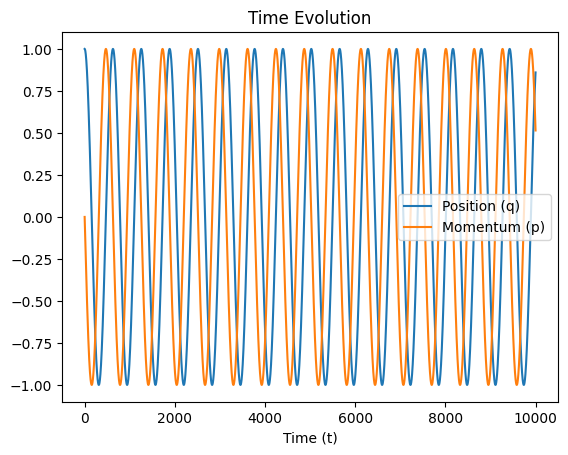

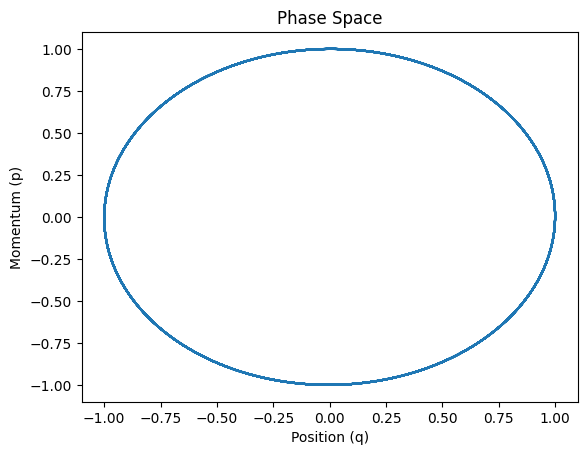

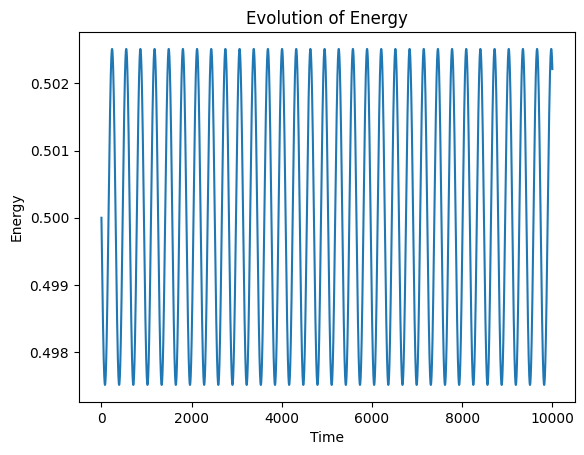

In [2]:
# Functions to be solved
# dq/dt = dH/dp -> q(t+1) = q(t) + dt*dH/dp
# dp/dt = -dH/dq -> p(t+1) = p(t) - dt*dH/dq

dt = 0.01 # time step
steps = 10000 # number of steps

q = np.zeros(steps)
p = np.zeros(steps)

# Initial conditions
q[0] = 1.0
p[0] = 0.0

# Definition of Hamiltonian
H = lambda q, p, k=1.0, m=1.0: 0.5*k*q**2 + 0.5*p**2/m # H = K + V

# Definition of functions
def dHdp(p, m=1.0): # m is the mass
    return p/m

def dHdq(q, k=1.0): # k is 
    return k*q

q, p = lb.symplectic_euler(q[0], p[0], 1, [dHdq], [dHdp], steps, dt)

# Plotting of the Phase Space
plt.plot(q, label="Position (q)")
plt.plot(p, label="Momentum (p)")
plt.xlabel("Time (t)")
plt.legend()
plt.title("Time Evolution")
plt.show()

plt.plot(q, p)
plt.xlabel("Position (q)")
plt.ylabel("Momentum (p)")
plt.title("Phase Space")
plt.show()

plt.plot(H(q, p), label="Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Evolution of Energy")
plt.show()



Slope of the linear regression for Euler's method:  [-1.81963489]


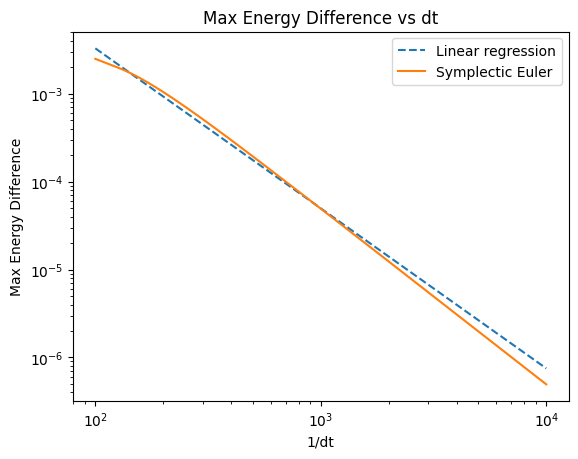

In [6]:
results_euler = []
dts = []
for dt in np.linspace(0.01, 0.0001, 100):
    q, p = lb.symplectic_euler(q[0], p[0], 1, [dHdq], [dHdp], 100, dt)
    results_euler.append(max(np.abs(H(q, p) - H(q[0], p[0]))))
    dts.append(dt)
    
# Linear regression
log_dts = np.log(1 / np.array(dts))
log_results_euler = np.log(results_euler)
coeffs_euler = np.polyfit(log_dts, log_results_euler, 1)
regression_line_euler = np.exp(coeffs_euler[1]) * (1 / np.array(dts)) ** coeffs_euler[0]

print("Slope of the linear regression for Euler's method: ", coeffs_euler[0])

plt.plot(1/np.array(dts), regression_line_euler, '--', label="Linear regression")
plt.loglog(1/np.array(dts), results_euler, label="Symplectic Euler")
plt.xlabel("1/dt")
plt.ylabel("Max Energy Difference")
plt.title("Max Energy Difference vs dt")
plt.legend()
plt.show()